In [1]:
using Distances
using PyPlot

In [2]:
# This function generates an Array that holds the positions of neurons
function neuron_locations(m,n)
    x = Array{Int64}(m*n,2)
    c = 1
    for i=1:m
        for j=1:n
            x[c,1]=i
            x[c,2]=j
            c+=1
        end
    end
    return x
end

#function map_vects(input_vects, weights, locations)
#    a = Array{Int}[]
#    for vect in input_vects
#        vdist = mapslices(norm, vect-weights[:], dims=1)
#        vval, vmin = findmin(vdist)
#        push!(a, locations[vmin])
#    end
#    return a
#end

function train(x, w, it, niter, dim, alpha, sigma, locations)
    stack_x = copy(x)
    for i in 1:m*n-1
        stack_x = vcat(stack_x, x)
    end
    dists = colwise(Euclidean(), stack_x', w')
    bmu_val, bmu_index = findmin(dists)
    bmu_loc = locations[bmu_index,:]

    # linearly decreasing learning rate
    learning_rate_op = 1.0 - it/niter
    alpha_op = alpha * learning_rate_op
    sigma_op = sigma * learning_rate_op
    
    bmu_sq = (locations' .- bmu_loc).^2
    bmu_distance_squares = sum(bmu_sq', 2)
    # Gaussian Neighbourhood function
    neighbourhood_func = exp.(-bmu_distance_squares/(sigma_op^2))
    
    learning_rate_op = alpha_op * neighbourhood_func
    res = fill(learning_rate_op[1],dim)
    for i in 2:m*n
        res = hcat(res, fill(learning_rate_op[i],dim))
    end
    learning_rate_multiplier = res
    #print(size(learning_rate_multiplier),size(stack_x),size(w))
    delta = learning_rate_multiplier' .* (stack_x .- w)
    #print(size(delta))
    return w + delta
end

train (generic function with 1 method)

In [11]:
function SOM(data, m, n, dim, niter, alpha=0.3):
    """
    2-D Self-Organizing Map with Gaussian Neighbourhood function
    and linearly decreasing learning rate.
    """
    sigma = max(m, n) / 2.0
    weights = randn(m*n,dim)
    locations = neuron_locations(m,n)

    for iter_no=1:niter
        #Train with each vector one by one
        if iter_no%10==0
            println("Training iteration: ",iter_no)
        end
        for i=1:size(data)[1]
            weights = train(data[i,:]', weights, iter_no, niter, dim, alpha, sigma, locations)
        end
    end
    #Store a centroid grid for easy retrieval later on
    centroid_grid = zeros(m, n, dim)
    for i=1:m*n
        centroid_grid[locations[i,1],locations[i,2],:]=weights[i,:]
    end
    #println("Image Done!")
    #Map colours to their closest neurons
    #mapped = map_vects(data, weights, locations)
    #mapped = 1
    
    return centroid_grid
end

SOM (generic function with 2 methods)

In [12]:
#Training inputs for RGBcolors
#colors = [[0. 0. 0.];
#    [0. 0. 1.];
#    [0. 0. 0.5];
#    [0.125 0.529 1.0];
#    [0.33 0.4 0.67];
#    [0.6 0.5 1.0];
#    [0. 1. 0.];
#    [1. 0. 0.];
#    [0. 1. 1.];
#    [1. 0. 1.];
#    [1. 1. 0.];
#    [1. 1. 1.];
#    [.33 .33 .33];
#    [.5 .5 .5];
#    [.66 .66 .66]]
#
#color_names = ["black", "blue", "darkblue", "skyblue",
#    "greyblue", "lilac", "green", "red",
#    "cyan", "violet", "yellow", "white",
#    "darkgrey", "mediumgrey", "lightgrey"]
colors = [[0. 0. 1.];
    [0.125 0.529 1.0];
    [0.6 0.5 1.0];
    [0. 1. 0.];
    [1. 0. 0.];
    [0. 1. 1.];
    [1. 0. 1.]]

color_names = ["blue", "skyblue",
    "lilac", "green", "red",
    "cyan", "violet"]

7-element Array{String,1}:
 "blue"   
 "skyblue"
 "lilac"  
 "green"  
 "red"    
 "cyan"   
 "violet" 

In [19]:
#Train a 20x30 SOM with 200 iterations
m = 20
n = 30
n_iter = 100
image_grid = SOM(colors, m, n, 3, n_iter)
println("Training is done.")

Training iteration: 10
Training iteration: 20
Training iteration: 30
Training iteration: 40
Training iteration: 50
Training iteration: 60
Training iteration: 70
Training iteration: 80
Training iteration: 90
Training iteration: 100
Training is done.


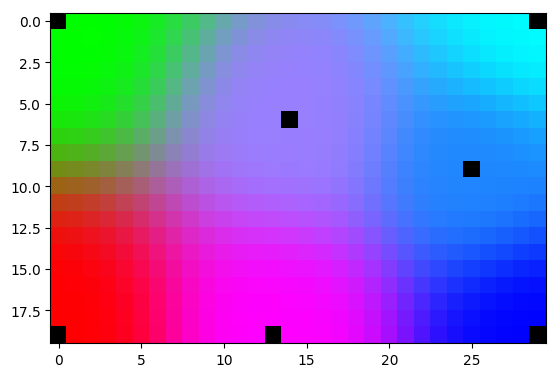

PyObject <matplotlib.image.AxesImage object at 0x2b2303e4d5f8>

In [20]:
imshow(image_grid)